# Tweet Scraping, Sentiment Analysis, Topic Modeling
- code was borrowed and adapted from https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
- https://towardsdatascience.com/selenium-tweepy-to-scrap-tweets-from-tweeter-and-analysing-sentiments-1804db3478ac

In [2]:
import numpy as np
import pandas as pd

In [3]:
import tweepy
#enter access tokens and keys here from your twitter app
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 

In [4]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

__Getting Tweets from my timeline into the notebook__

In [5]:
# Using the API object to get tweets from your timeline, and storing it in a variable called public_tweets
public_tweets = api.home_timeline()
# foreach through all tweets pulled
for tweet in public_tweets:
   # printing the text stored inside the tweet object
   print (tweet.text)

Once again, @realDonaldTrump is defying expectations on economic growth by surpassing the 2.3 percent expansion pre… https://t.co/6kEmwa8lUK
I made my donation to @supertalk @PalmerHome Radiothon at https://t.co/PRzrvhJpaO. They do so much good for childre… https://t.co/bjCxqESA2T
RT @MississippiAGO: The opioid crisis is not a one-issue problem, so there is no one-way solution. The importance of cross disciplinary tra…
Proud to be endorsed by @bullybloc, a non-partisan group of friends and alumni of @msstate committed to electing po… https://t.co/OnOWqvuZG6
When fees for hunting and fishing licenses go up, do you ever wonder if those fees are spent the way the law requir… https://t.co/vZrdlSdCgd
I have appointed former Federal Bureau of Investigation Special Agent in Charge Christopher Freeze as Executive Dir… https://t.co/ubskLvFb4n
Our geopolitical rivals have invested heavily in their shipbuilding capacity, and the U.S. should keep pace. This w… https://t.co/xUEgLiVi3n
The workforce

__These are all of governer Phil Bryant's latest tweets__

In [109]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The Twitter user who we want to get tweets from
name = "PhilBryantMS"

# Number of tweets to pull
tweetCount = 1000

# Calling the user_timeline function with our parameters
results = api.user_timeline(id=name, count=tweetCount)

# foreach through all tweets pulled
for tweet in results:
    
   # printing the text stored inside the tweet object
    print (tweet.text)

President Trump reminds us once again that it is the people that Make America Great. Thank you Mr. President for yo… https://t.co/NVsIrI4m7z
I’m for Tate.                                   https://t.co/y3Iy6gq2EE
Women were very prominent in founding of nation on July 4th 1776. One of those included Betsy Ross who handmade one… https://t.co/SIH6iTmozc
Appreciate our entire Congressional Delegation for helping improve airports all across Mississippi. Let’s Fly. https://t.co/5KXKueVqw5
Thank you @CongPalazzo. I am sure @SecretaryRoss will do all he can to help.  Your support will certainly help. https://t.co/KcILha7lf6
Unbelievable success these past 7 years in terms of housing. I appreciate the work of Scott Spivey and his team at… https://t.co/hrGDndFveO
Great conversation this morning with @SecretaryCarson. He thanked @mdaworks @PortofGulfport for their hard work in… https://t.co/qy3Ml77sNw
Ray you’ve been gone awhile but trust me our state doesn’t long for the days of 9% unemployment

In [19]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
class SeleniumClient(object):
    def __init__(self):
        #Initialization method. 
        self.chrome_options = webdriver.ChromeOptions()
        self.chrome_options.add_argument('--headless')
        self.chrome_options.add_argument('--no-sandbox')
        self.chrome_options.add_argument('--disable-setuid-sandbox')

        # you need to provide the path of chromdriver in your system
        self.browser = webdriver.Chrome('C:\webdrivers\chromedriver.exe', options=self.chrome_options)
       
        self.base_url = 'https://twitter.com/search?q='

    def get_tweets(self, query):
        ''' 
        Function to fetch tweets. 
        '''
        try: 
            self.browser.get(self.base_url+query)
            time.sleep(2)

            body = self.browser.find_element_by_tag_name('body')

            for _ in range(3000):
                body.send_keys(Keys.PAGE_DOWN)
                time.sleep(0.3)

            timeline = self.browser.find_element_by_id('timeline')
            tweet_nodes = timeline.find_elements_by_css_selector('.tweet-text')

            return pd.DataFrame({'tweets': [tweet_node.text for tweet_node in tweet_nodes]})

        except: 
            print("Selenium - An error occured while fetching tweets.")

In [289]:
selenium_client = SeleniumClient()

tweets_df = selenium_client.get_tweets("PhilBryantMS")

Selenium - An error occured while fetching tweets.


# Modified this class to retrieve timelines rather than references to people's twitter handle
- https://towardsdatascience.com/selenium-tweepy-to-scrap-tweets-from-tweeter-and-analysing-sentiments-1804db3478ac

In [6]:
import tweepy
from tweepy import OAuthHandler

name = "PhilBryantMS"


class TwitterClient(object): 
    
    def __init__(self):
       # Access Credentials 
        #this is where your access tokens and keys go
        consumer_key = 
        consumer_secret = 
        access_token = 
        access_token_secret = 
        try: 
            # OAuthHandler object 
            auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            
        except tweepy.TweepError as e:
            print(f"Error: Twitter Authentication Failed - \n{str(e)}") 

   # Function to fetch tweets
    def get_tweets(self, query, maxTweets = 7000): 
        # empty list to store parsed tweets 
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 1000
        
        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = self.api.user_timeline(id=name, count=tweetsPerQry)
                    else:
                        new_tweets = self.api.user_timeline(id=name, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = self.api.user_timeline(id=name, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = self.api.user_timeline(id=name, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break
                    
                for tweet in new_tweets:
                    parsed_tweet = {} 
                    parsed_tweet['tweets'] = tweet.text 

                    # appending parsed tweet to tweets list 
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                            tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet) 
                        
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                print("Tweepy error : " + str(e))
                break
        
        return pd.DataFrame(tweets)

__Instantiate the class, then create a df__

In [244]:
client = TwitterClient()

tweets_df = client.get_tweets("PhilBryantMS")

Downloaded 200 tweets
Downloaded 400 tweets
Downloaded 600 tweets
Downloaded 800 tweets
Downloaded 1000 tweets
Downloaded 1200 tweets
Downloaded 1400 tweets
Downloaded 1600 tweets
Downloaded 1800 tweets
Downloaded 2000 tweets
Downloaded 2200 tweets
Downloaded 2400 tweets
Downloaded 2599 tweets
Downloaded 2799 tweets
Downloaded 2998 tweets
Downloaded 3198 tweets
Downloaded 3213 tweets
No more tweets found


In [245]:
tweets_df

,tweets
0,President Trump reminds us once again that it ...
1,I’m for Tate. ...
2,Women were very prominent in founding of natio...
3,Appreciate our entire Congressional Delegation...
4,Thank you @CongPalazzo. I am sure @SecretaryRo...
5,Unbelievable success these past 7 years in ter...
6,Great conversation this morning with @Secretar...
7,Ray you’ve been gone awhile but trust me our s...
8,Well said Commissioner. We will stand with you...
9,Great to hear @US_EDA @CommerceGov awarded Cit...


__Try to remove @__

In [246]:
import re
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
tweets_df['tidy_tweets'] = np.vectorize(remove_pattern)(tweets_df['tweets'], "@[\w]*: | *RT*")

__Remove links__

In [247]:
cleaned_tweets = []

for index, row in tweets_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

tweets_df['tidy_tweets'] = cleaned_tweets

__Drop duplicate rows__

In [248]:
tweets_df.drop_duplicates(subset=['tidy_tweets'], keep=False)

,tweets,tidy_tweets
0,President Trump reminds us once again that it ...,President Trump reminds us once again that it ...
1,I’m for Tate. ...,I’m for Tate.
2,Women were very prominent in founding of natio...,Women were very prominent in founding of natio...
3,Appreciate our entire Congressional Delegation...,Appreciate our entire Congressional Delegation...
4,Thank you @CongPalazzo. I am sure @SecretaryRo...,Thank you @CongPalazzo. I am sure @Secretaryos...
5,Unbelievable success these past 7 years in ter...,Unbelievable success these past 7 years in ter...
6,Great conversation this morning with @Secretar...,Great conversation this morning with @Secretar...
7,Ray you’ve been gone awhile but trust me our s...,ay you’ve been gone awhile but trust me our st...
8,Well said Commissioner. We will stand with you...,Well said Commissioner. We will stand with you...
9,Great to hear @US_EDA @CommerceGov awarded Cit...,Great to hear @US_EDA @CommerceGov awarded Cit...


__Remove numbers, punctuation, and special characters__

In [249]:
tweets_df['absolute_tidy_tweets'] = tweets_df['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")

__Remove stop words__

In [250]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))
cleaned_tweets = []

for index, row in tweets_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))

tweets_df['absolute_tidy_tweets'] = cleaned_tweets

[nltk_data] Downloading package stopwords to C:\Users\Sam
[nltk_data]     Cannon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


__tokenization and lemmatization__

In [251]:
from nltk.stem import WordNetLemmatizer
# Tokenization
tokenized_tweet = tweets_df['absolute_tidy_tweets'].apply(lambda x: x.split())
# Finding Lemma for each word
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
#joining words into sentences (from where they came from)
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweets_df['absolute_tidy_tweets'] = tokenized_tweet

In [252]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(tweets_df['absolute_tidy_tweets'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets_df['absolute_tidy_tweets'])

In [253]:
tweets_df

,tweets,tidy_tweets,absolute_tidy_tweets
0,President Trump reminds us once again that it ...,President Trump reminds us once again that it ...,President Trump reminds u people Make America ...
1,I’m for Tate. ...,I’m for Tate.,Im Tate
2,Women were very prominent in founding of natio...,Women were very prominent in founding of natio...,Women prominent founding nation July th One in...
3,Appreciate our entire Congressional Delegation...,Appreciate our entire Congressional Delegation...,Appreciate entire Congressional Delegation hel...
4,Thank you @CongPalazzo. I am sure @SecretaryRo...,Thank you @CongPalazzo. I am sure @Secretaryos...,Thank CongPalazzo I sure Secretaryoss help You...
5,Unbelievable success these past 7 years in ter...,Unbelievable success these past 7 years in ter...,Unbelievable success past year term housing I ...
6,Great conversation this morning with @Secretar...,Great conversation this morning with @Secretar...,Great conversation morning SecretaryCarson He ...
7,Ray you’ve been gone awhile but trust me our s...,ay you’ve been gone awhile but trust me our st...,ay youve gone awhile trust state doesnt long d...
8,Well said Commissioner. We will stand with you...,Well said Commissioner. We will stand with you...,Well said Commissioner We stand protect people...
9,Great to hear @US_EDA @CommerceGov awarded Cit...,Great to hear @US_EDA @CommerceGov awarded Cit...,Great hear USEDA CommerceGov awarded City Dura...


# Sentiment
- These functions reveal sentiment for text, but we must use different code for columnwise operations, this code is in the cells below the functions

In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    if polarity_scores['neg'] > polarity_scores['pos']:
        return 'negative'
    else:
        return 'positive'

def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    # set sentiment 
    if analysis.sentiment.polarity >= 0:
        return 'positive'
    else: 
        return 'negative'

__applying sentiment analysis columnwise__

In [255]:
tweets_df[['polarity','subjectivity']] = tweets_df['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [256]:
tweets_df

,tweets,tidy_tweets,absolute_tidy_tweets,polarity,subjectivity
0,President Trump reminds us once again that it ...,President Trump reminds us once again that it ...,President Trump reminds u people Make America ...,0.800000,0.750000
1,I’m for Tate. ...,I’m for Tate.,Im Tate,0.000000,0.000000
2,Women were very prominent in founding of natio...,Women were very prominent in founding of natio...,Women prominent founding nation July th One in...,0.650000,1.000000
3,Appreciate our entire Congressional Delegation...,Appreciate our entire Congressional Delegation...,Appreciate entire Congressional Delegation hel...,0.400000,0.762500
4,Thank you @CongPalazzo. I am sure @SecretaryRo...,Thank you @CongPalazzo. I am sure @Secretaryos...,Thank CongPalazzo I sure Secretaryoss help You...,0.357143,0.730159
5,Unbelievable success these past 7 years in ter...,Unbelievable success these past 7 years in ter...,Unbelievable success past year term housing I ...,-0.066667,0.416667
6,Great conversation this morning with @Secretar...,Great conversation this morning with @Secretar...,Great conversation morning SecretaryCarson He ...,0.254167,0.645833
7,Ray you’ve been gone awhile but trust me our s...,ay you’ve been gone awhile but trust me our st...,ay youve gone awhile trust state doesnt long d...,0.055000,0.470000
8,Well said Commissioner. We will stand with you...,Well said Commissioner. We will stand with you...,Well said Commissioner We stand protect people...,0.000000,0.000000
9,Great to hear @US_EDA @CommerceGov awarded Cit...,Great to hear @US_EDA @CommerceGov awarded Cit...,Great hear USEDA CommerceGov awarded City Dura...,0.800000,0.750000


In [257]:
target_variable = tweets_df['polarity'].apply(lambda x: 0 if x < 0 else 1 )

In [258]:
target_variable

0       1
1       1
2       1
3       1
4       1
5       0
6       1
7       1
8       1
9       1
10      1
11      1
12      0
13      1
14      1
15      0
16      1
17      1
18      1
19      1
20      1
21      1
22      0
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3182    1
3183    1
3184    1
3185    1
3186    1
3187    1
3188    1
3189    1
3190    1
3191    1
3192    1
3193    1
3194    0
3195    1
3196    1
3197    1
3198    1
3199    1
3200    1
3201    1
3202    1
3203    1
3204    1
3205    1
3206    1
3207    1
3208    1
3209    1
3210    1
3211    1
Name: polarity, Length: 3212, dtype: int64

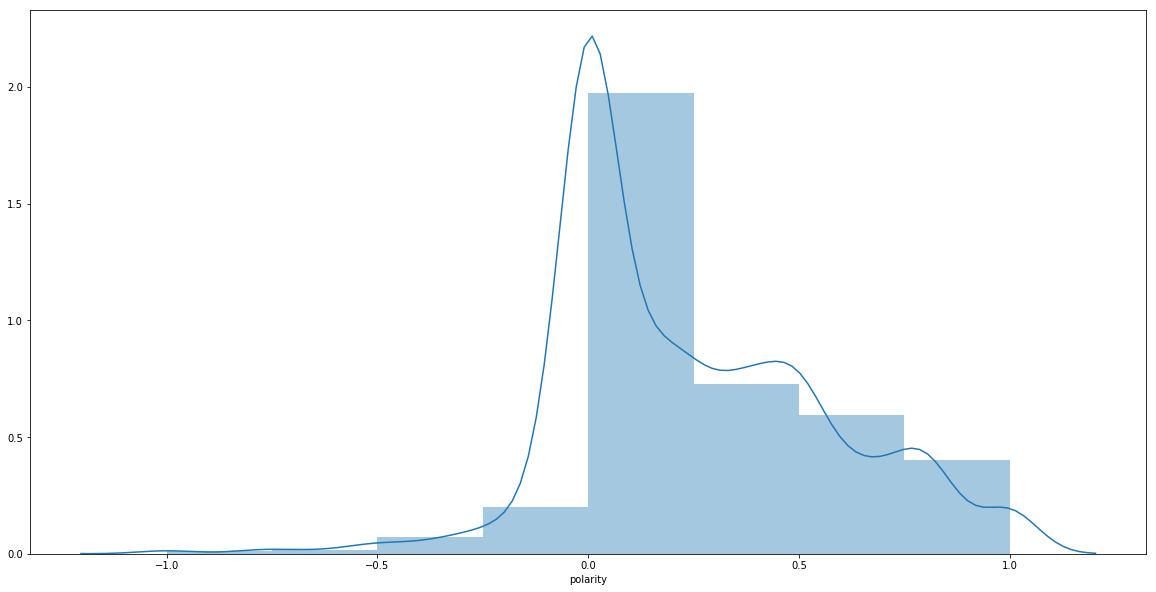

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 10))
sns.distplot(tweets_df['polarity'], bins = 8)

In [231]:
neg_tweets = tweets_df[tweets_df['polarity'] < 0]

In [232]:
neg_tweets

,tweets,tidy_tweets,absolute_tidy_tweets,polarity,subjectivity
5,Unbelievable success these past 7 years in ter...,Unbelievable success these past 7 years in ter...,Unbelievable success past year term housing I ...,-0.066667,0.416667
12,I believe that we have the capabilities to att...,I believe that we have the capabilities to att...,I believe capability attract space company inv...,-0.125000,0.375000
15,Strange how some Metro media outlets report th...,Strange how some Metro media outlets report th...,Strange Metro medium outlet report Chism poll ...,-0.050000,0.150000
22,Lt. Governor @tatereeves has worked hard for t...,Lt. Governor @tatereeves has worked hard for t...,Lt Governor tatereeves worked hard number Im Tate,-0.364583,0.541667
38,Thanks for joining Mississippi in leading in c...,Thanks for joining Mississippi in leading in c...,Thanks joining Mississippi leading criminal ju...,-0.100000,0.375000
58,Men in Black do it again. #HailState https://t...,Men in Black do it again. #HailState,Men Black #HailState,-0.166667,0.433333
67,Because of the hard work &amp; determination o...,Because of the hard work &amp; determination o...,Because hard work amp determination community ...,-0.045833,0.370833
82,ecosystem impacts due to the opening of the Sp...,ecosystem impacts due to the opening of the Sp...,ecosystem impact due opening Spillway We relea...,-0.125000,0.375000
88,Terribly sad day in Kemper County. @FirstLady_...,Terribly sad day in Kemper County. @FirstLady_...,Terribly sad day Kemper County FirstLadyMS I o...,-0.500000,1.000000
154,Nursing is the nation’s largest healthcare pro...,Nursing is the nation’s largest healthcare pro...,Nursing nation largest healthcare profession I...,-0.291667,0.541667


# Feature Extraction using TF-IDF and Bag of Words

In [233]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(tweets_df['absolute_tidy_tweets'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets_df['absolute_tidy_tweets'])

# Predicting tweet sentiment using naive_bayes 

In [236]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())
    
    # calculating f1 score
    print(f'F1 Score - {f1_score(y_test, predictions)}')

__Use Bag or Words Feature__

In [237]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=870)
naive_model(X_train, X_test, y_train, y_test)

F1 Score - 0.9469964664310954


__Use TF-IDF Feature__

In [238]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=870)
naive_model(X_train, X_test, y_train, y_test)

F1 Score - 0.9469964664310954
